<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/docs/docs/integrations/chat/google_generative_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
sidebar_label: Google Gemini
---

# ChatGoogleGenerativeAI

Access Google's Generative AI models, including the Gemini family, directly via the Gemini API or experiment rapidly using Google AI Studio. The `langchain-google-genai` package provides the LangChain integration for these models. This is often the best starting point for individual developers.

For information on the latest models, their features, context windows, etc. head to the [Google AI docs](https://ai.google.dev/gemini-api/docs/models/gemini). All model ids can be found in the [Gemini API docs](https://ai.google.dev/gemini-api/docs/models).

### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/docs/integrations/chat/google_generativeai) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatGoogleGenerativeAI](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) | [langchain-google-genai](https://python.langchain.com/api_reference/google_genai/index.html) | ❌ | beta | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-google-genai?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-google-genai?style=flat-square&label=%20) |

### Model features

| [Tool calling](/docs/how_to/tool_calling) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: | :---: | :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ | ✅ | ❌ | ✅ | ✅ | ✅ | ✅ | ✅ | ✅ | ❌ |

### Setup

To access Google AI models you'll need to create a Google Account, get a Google AI API key, and install the `langchain-google-genai` integration package.

**1. Installation:**

In [1]:
%pip install -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


**2. Credentials:**

Head to [https://ai.google.dev/gemini-api/docs/api-key](https://ai.google.dev/gemini-api/docs/api-key) (or via Google AI Studio) to generate a Google AI API key.

### Chat Models

Use the `ChatGoogleGenerativeAI` class to interact with Google's chat models. See the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) for full details.


In [17]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter the key: ")

To enable automated tracing of your model calls, set your [LangSmith](https://docs.smith.langchain.com/) API key:

In [3]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

## Instantiation

Now we can instantiate our model object and generate chat completions:

In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Invocation

In [19]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'aime la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--ede48096-d935-4142-b24b-1a3f1e310435-0', usage_metadata={'input_tokens': 21, 'output_tokens': 60, 'total_tokens': 81, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 53}})

In [6]:
print(ai_msg.content)

J'aime la programmation.


## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

In [20]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Ich liebe Programmieren.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--5d0809c0-be52-46eb-9015-a557ea75a8f0-0', usage_metadata={'input_tokens': 16, 'output_tokens': 5, 'total_tokens': 21, 'input_token_details': {'cache_read': 0}})

### Image Generation (Multimodal Output)

Certain models (such as `gemini-2.0-flash-preview-image-generation`) can generate text and images inline. You need to specify the desired `response_modalities`. See more information on the [Gemini API docs](https://ai.google.dev/gemini-api/docs/image-generation) for details.

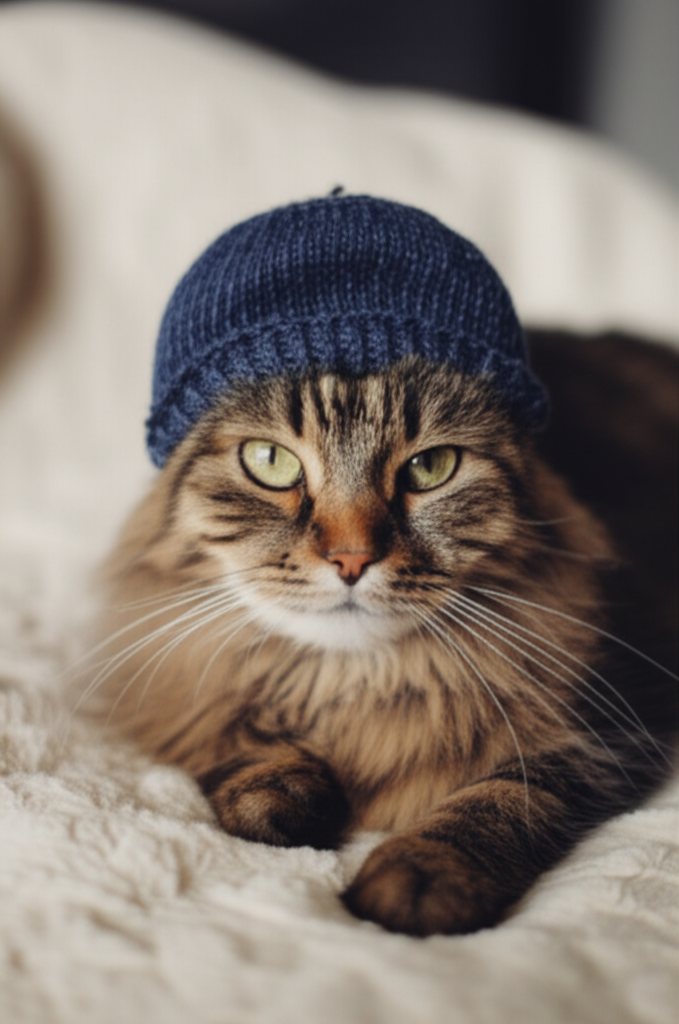

In [21]:
import base64

from IPython.display import Image, display
from langchain_core.messages import AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")

message = {
    "role": "user",
    "content": "Generate a photorealistic image of a cuddly cat wearing a hat.",
}

response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)


def _get_image_base64(response: AIMessage) -> None:
    image_block = next(
        block
        for block in response.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]


image_base64 = _get_image_base64(response)
display(Image(data=base64.b64decode(image_base64), width=300))

### Image and text to image

You can iterate on an image in a multi-turn conversation, as shown below:

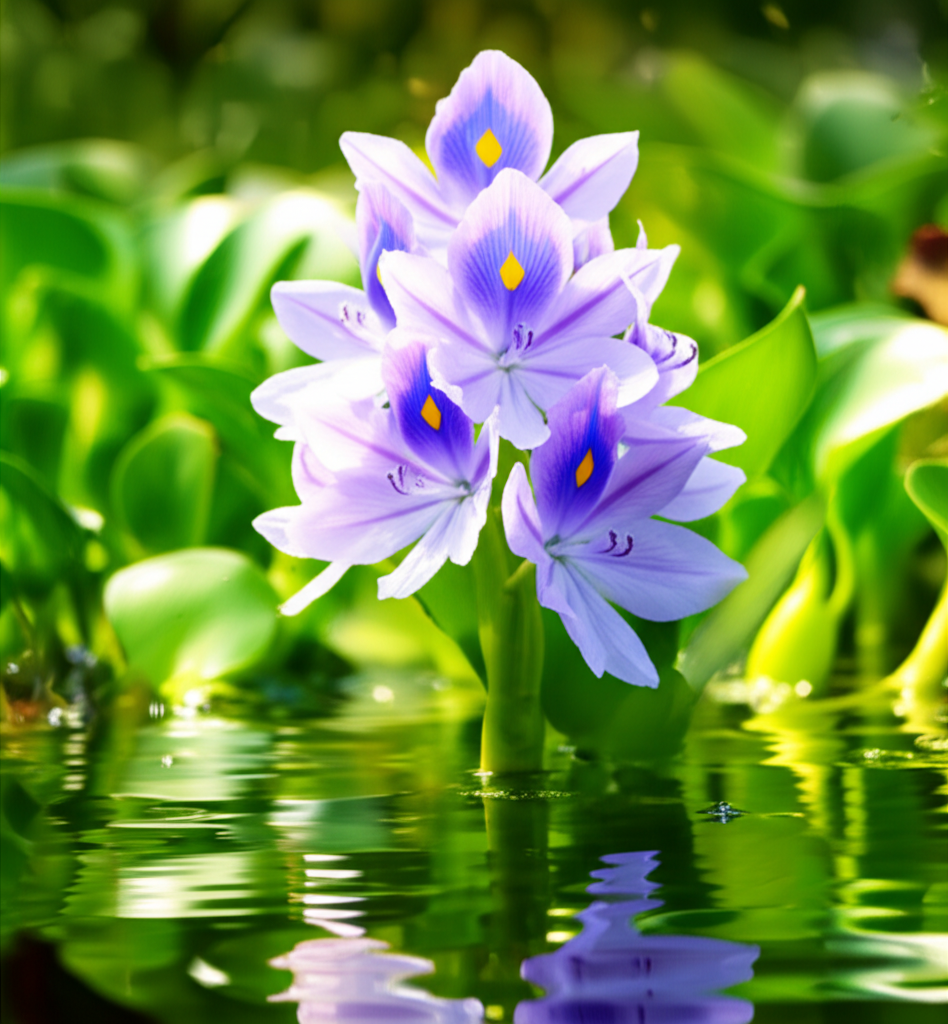

In [22]:
next_message = {
    "role": "user",
    "content": "Can you create a image of a water hyacinth plant?",
}

response = llm.invoke(
    [message, response, next_message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

image_base64 = _get_image_base64(response)
display(Image(data=base64.b64decode(image_base64), width=300))

You can also represent an input image and query in a single message by encoding the base64 data in the [data URI scheme](https://en.wikipedia.org/wiki/Data_URI_scheme):

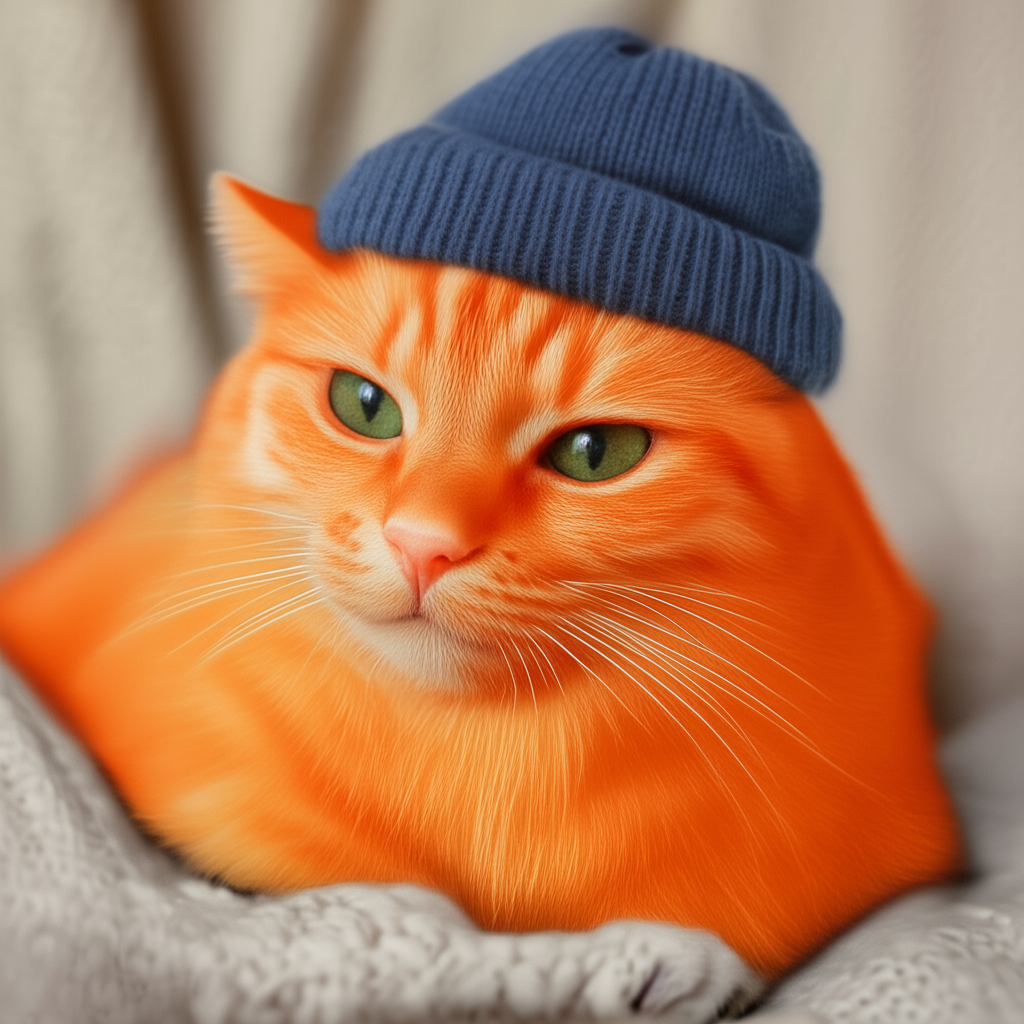

In [ ]:
message = {
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "Can you make this cat orange?",
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{image_base64}"},
        },
    ],
}

response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

image_base64 = _get_image_base64(response)
display(Image(data=base64.b64decode(image_base64), width=300))

You can also use LangGraph to manage the conversation history for you as in [this tutorial](/docs/tutorials/chatbot/).